<h1>Polygon Time Series Model</h1>
A time series model using the Polygon.io API.

In [1]:
#import necessary libraries
import pandas as pd
from datetime import date
from matplotlib import pyplot as plt
import seaborn as sns
import requests
import warnings;
warnings.simplefilter('ignore')
today = date.today()

Below, input your API key, the stock ticker of interest, the start date, and the amount of periods to forecast into the future.

In [2]:
#input all parameters
api_key = "XXXXXX"
stock_ticker = "XXXX"
start_date = "YYYY-MM-DD"
end_date = today.strftime("%Y-%m-%d")
#input future length
periods = 60

In [3]:
#pulls data from Polygon
get_request = "https://api.polygon.io/v2/aggs/ticker/" + stock_ticker + "/range/1/day/" + start_date + "/" + end_date + "?adjusted=true&sort=asc&limit=50000&apiKey=" + api_key
request = requests.get(get_request)

In [4]:
#create dataframe
df1 = pd.read_json(request.content)
df = pd.DataFrame(df1.results.values.tolist())
df.columns = ['volume', 'volume_weighted_avg_price', 'open_price', 'close_price', 'high', 'low', 'time', 'transactions']
df.head()

,volume,volume_weighted_avg_price,open_price,close_price,high,low,time,transactions
0,101045465.0,141.6680,146.024,137.344,150.666,134.758,1587441600000,453966
1,71124155.0,142.0028,140.796,146.422,146.800,137.742,1587528000000,283997
2,66183485.0,144.1158,145.520,141.126,146.800,140.626,1587614400000,253702
3,66178370.0,142.9759,142.162,145.030,146.146,139.636,1587700800000,235377
4,103407210.0,156.7946,147.522,159.750,159.898,147.000,1587960000000,433976


In [5]:
#convert Unix time to Y/M/D
df['date'] = df['time'].apply(lambda x: date.fromtimestamp(x/1000).strftime('%Y-%m-%d'))
df.drop(columns=['time'], inplace=True)
df.head()

,volume,volume_weighted_avg_price,open_price,close_price,high,low,transactions,date
0,101045465.0,141.6680,146.024,137.344,150.666,134.758,453966,2020-04-21
1,71124155.0,142.0028,140.796,146.422,146.800,137.742,283997,2020-04-22
2,66183485.0,144.1158,145.520,141.126,146.800,140.626,253702,2020-04-23
3,66178370.0,142.9759,142.162,145.030,146.146,139.636,235377,2020-04-24
4,103407210.0,156.7946,147.522,159.750,159.898,147.000,433976,2020-04-27


<h1>Prophet Time Series:</h1>

In [11]:
#import prophet, create dataframe, and fit model
from prophet import Prophet
close_price_df = df[['date','close_price']]
close_price_df.columns = ['ds', 'y']
close_price_df['ds'] = pd.DatetimeIndex(close_price_df['ds'])
model = Prophet(interval_width = .95, daily_seasonality=True)
model.fit(close_price_df)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [7]:
#create future
future = model.make_future_dataframe(periods)
#predict with prophet model
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()]


,ds,yhat
500,2022-04-13,957.862281
501,2022-04-14,952.806192
502,2022-04-18,955.739085
503,2022-04-19,955.578435
504,2022-04-20,955.916165
505,2022-04-21,950.860076
506,2022-04-22,948.018793
507,2022-04-23,958.104736
508,2022-04-24,957.826719
509,2022-04-25,953.792969


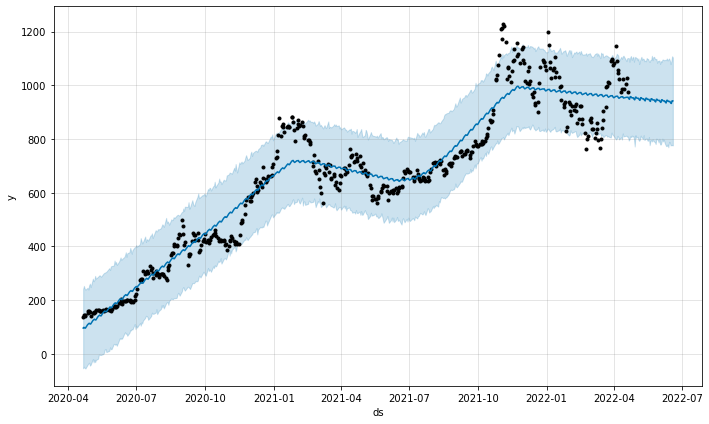

In [8]:
fig1 = model.plot(forecast)

Above, we have a plot of the stock price data points, with the line of the Time Series plotted throughout. This will be different for each dataset and model.

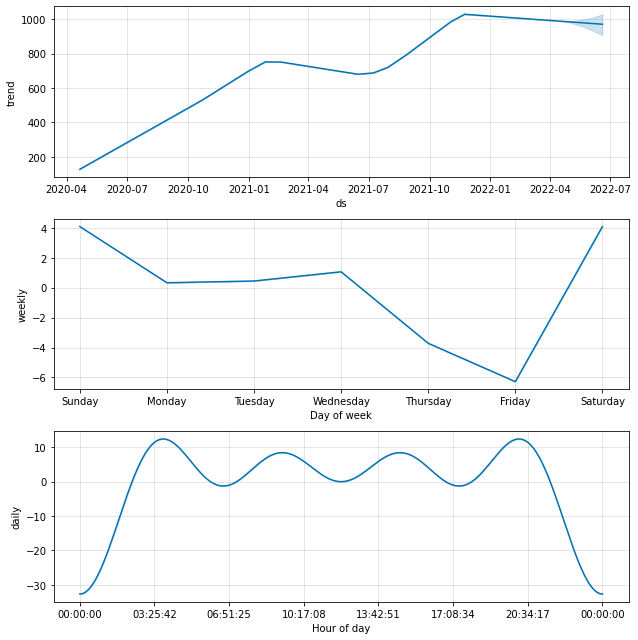

In [10]:
fig2 = model.plot_components(forecast)

Above, the three plots show the component importance. This will be different for each model.